<a href="https://colab.research.google.com/github/renu0071989/Emotion-Detection-CNN/blob/main/CNN_Image_classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
##Install Dependencies and setup

In [66]:
!pip install tensorflow

!pip install opencv
import matplotlib


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import tensorflow as tf
import os

Remove dodgy images

In [69]:
import cv2
import imghdr
import os



In [70]:
data_dir='/content/drive/MyDrive/Image classification'


In [71]:
image_exts=['jpeg','jpg','bmp','png']

In [72]:
os.listdir(data_dir)

['Happy', 'Sad', 'log', '.ipynb_checkpoints']

In [73]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)



Issue with image /content/drive/MyDrive/Image classification/log/train
Issue with image /content/drive/MyDrive/Image classification/log/validation
Issue with image /content/drive/MyDrive/Image classification/log/.ipynb_checkpoints
Image not in ext list/content/drive/MyDrive/Image classification/.ipynb_checkpoints/happysadmodel.h5


In [74]:
##Load Data

In [75]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Image classification')

Found 399 files belonging to 3 classes.


In [77]:
data_iterator=data.as_numpy_iterator()

In [78]:
data_iterator

In [79]:
batch=data_iterator.next()

batch[0] loads images and batch[1] loads labels

In [80]:
batch[0].shape

(32, 256, 256, 3)

In [81]:
batch[1]

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [82]:
##To find flags

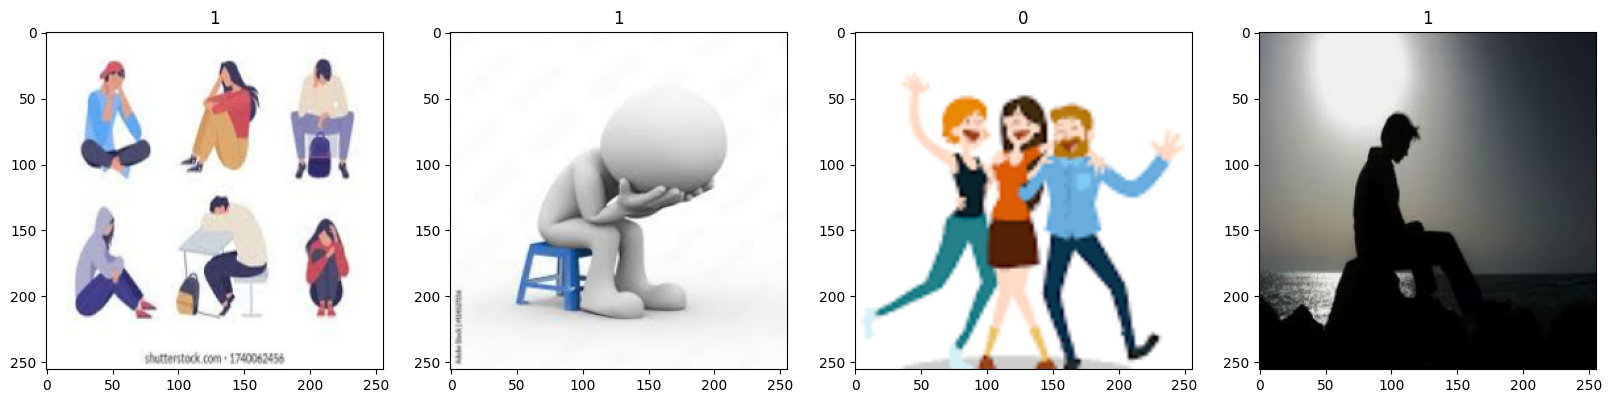

In [83]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [84]:
###1-Sad
##0-Happy

In [85]:
###Preprocessing Data

In [86]:
data=data.map(lambda x,y:(x/255,y))

In [87]:
scaled_iterator=data.as_numpy_iterator()

In [88]:
batch=scaled_iterator.next()

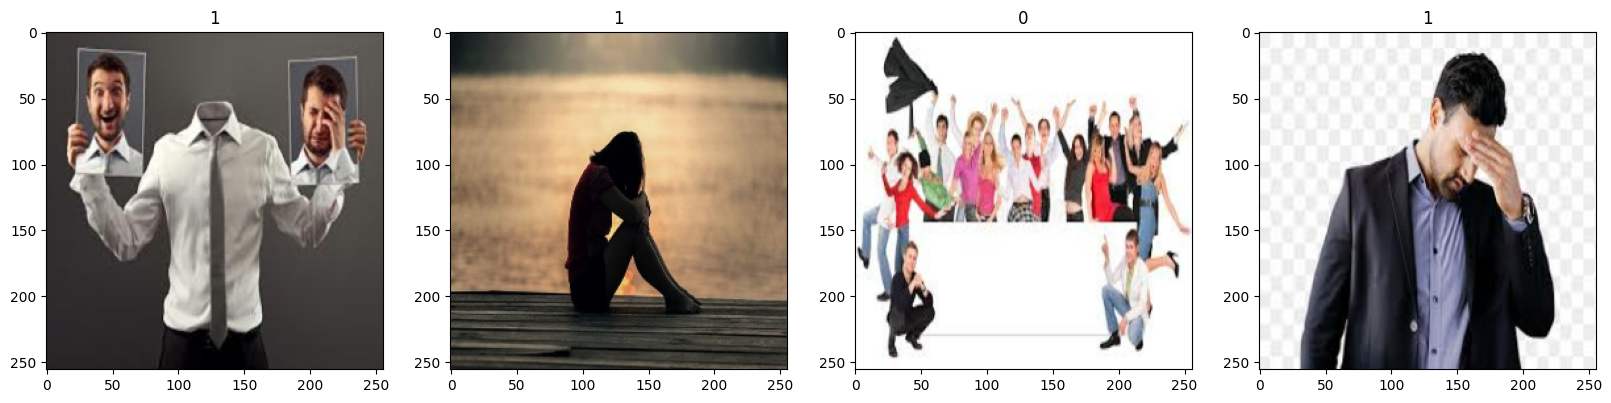

In [89]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [90]:
###SPLIT DATA

In [91]:
len(data)

13

In [92]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [93]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [94]:
##Build deep learning model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [96]:
model=Sequential()

In [97]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [98]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [100]:
##TRAIN

In [101]:
logdir='/content/drive/MyDrive/Image classification/log'

In [102]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [103]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 16s 758ms/step - loss: 0.7526 - accuracy: 0.5903 - val_loss: 0.6636 - val_accuracy: 0.5000
Epoch 2/20
9/9 [==============================] - 5s 437ms/step - loss: 0.6233 - accuracy: 0.6701 - val_loss: 0.5280 - val_accuracy: 0.7031
Epoch 3/20
9/9 [==============================] - 5s 390ms/step - loss: 0.4525 - accuracy: 0.8021 - val_loss: 0.3737 - val_accuracy: 0.7812
Epoch 4/20
9/9 [==============================] - 7s 593ms/step - loss: 0.3271 - accuracy: 0.8681 - val_loss: 0.1600 - val_accuracy: 0.9219
Epoch 5/20
9/9 [==============================] - 5s 396ms/step - loss: 0.2621 - accuracy: 0.8958 - val_loss: 0.1436 - val_accuracy: 0.9531
Epoch 6/20
9/9 [==============================] - 8s 781ms/step - loss: 0.1567 - accuracy: 0.9514 - val_loss: 0.1297 - val_accuracy: 0.9531
Epoch 7/20
9/9 [==============================] - 5s 380ms/step - loss: 0.1423 - accuracy: 0.9479 - val_loss: 0.1262 - val_accuracy: 0.9688
Epoch 8/20
9/9 [===

In [104]:
##plot performance

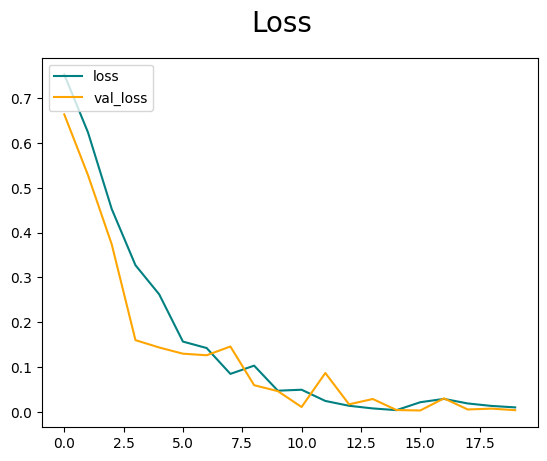

In [105]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

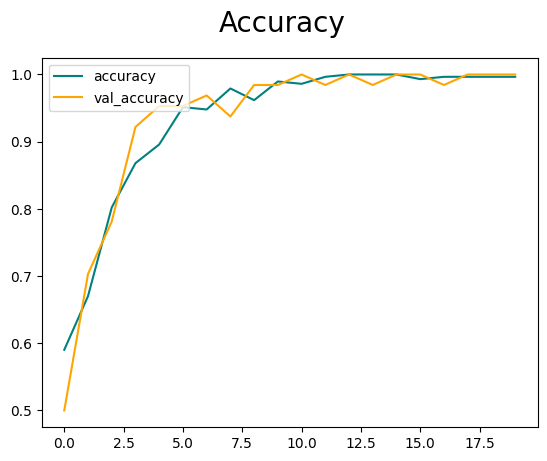

In [106]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [107]:
##EVAlUATE MoDEL

In [108]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [109]:
pre=Precision()
re=Recall()
acc= BinaryAccuracy()

In [110]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 [==============================] - 0s 79ms/step


In [111]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9642857313156128,Recall:1.0,Accuracy:0.978723406791687


In [112]:
###TEST

In [113]:
import cv2

In [114]:
img=cv2.imread('INSERT IMAGE>EXT')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [ ]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat> 0.5:
  print("Sad")
else:
  print("Happy")

In [ ]:
###Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Image classification','happysadmodel.h5'))

In [ ]:
yhatnew= new_model.predict(np.expand_dims(resize/255,0))

In [ ]:
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
if yhat> 0.5:
  print("Sad")
else:
  print("Happy")